In [1]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",50)
from sklearn import preprocessing
import matplotlib as mpl
mpl.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
import keras
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import keras.backend as K
import tensorflow as tf

sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = [15,10]

In [2]:
df = pd.read_csv("../input/heart-failure-prediction/heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [6]:
df.ExerciseAngina.value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [7]:
df.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [8]:
df.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Check the correlation between the features

<AxesSubplot:>

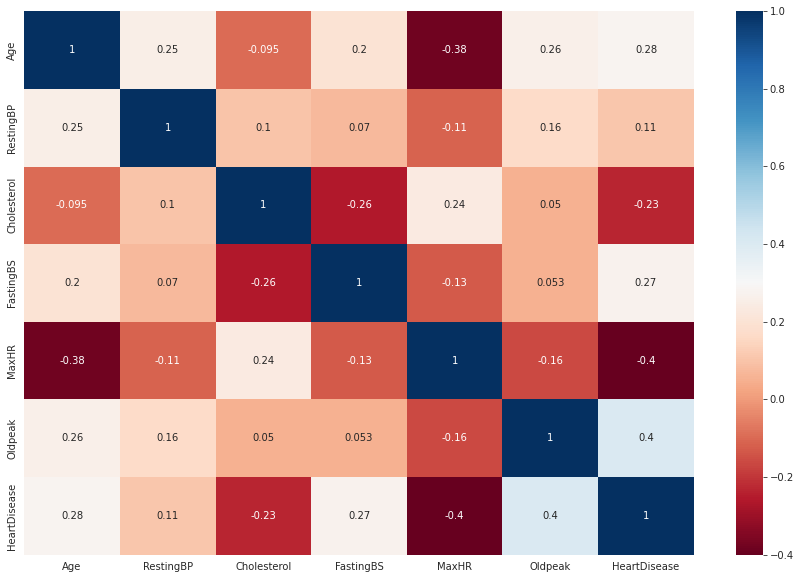

In [11]:
correlation = df.corr()
sns.heatmap(correlation, annot= True, cmap = 'RdBu')

In [12]:
df['HeartDisease']= df['HeartDisease'].astype('category')

# Data Visulaization 

Text(0.5, 1.0, 'Distribution of Heart Diseases over Age')

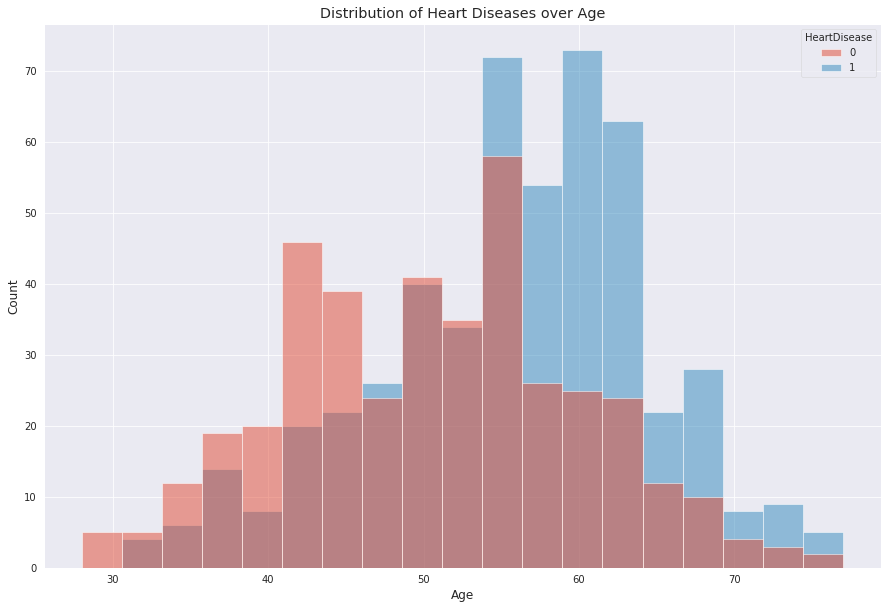

In [13]:
sns.histplot(data = df ,x = 'Age', hue = 'HeartDisease')
plt.title("Distribution of Heart Diseases over Age")

In [14]:
px.histogram(data_frame = df, x = 'Sex', color = 'HeartDisease', title="Distribution of Heart Diseases over Sex",barmode="group")

Text(0.5, 1.0, 'Distribution of Heart Diseases over RestingECG')

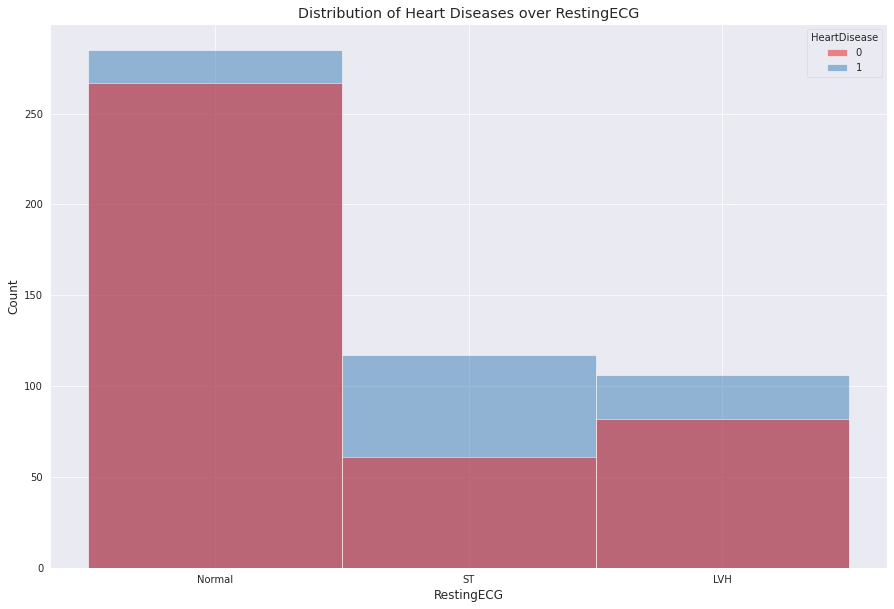

In [15]:
sns.histplot(data = df ,x = 'RestingECG', hue = 'HeartDisease',palette = 'Set1')
plt.title("Distribution of Heart Diseases over RestingECG")

In [16]:
px.histogram(data_frame = df, x = 'ChestPainType', color = 'HeartDisease', title="Distribution of Heart Diseases over ChestPainType",barmode="group")


[]

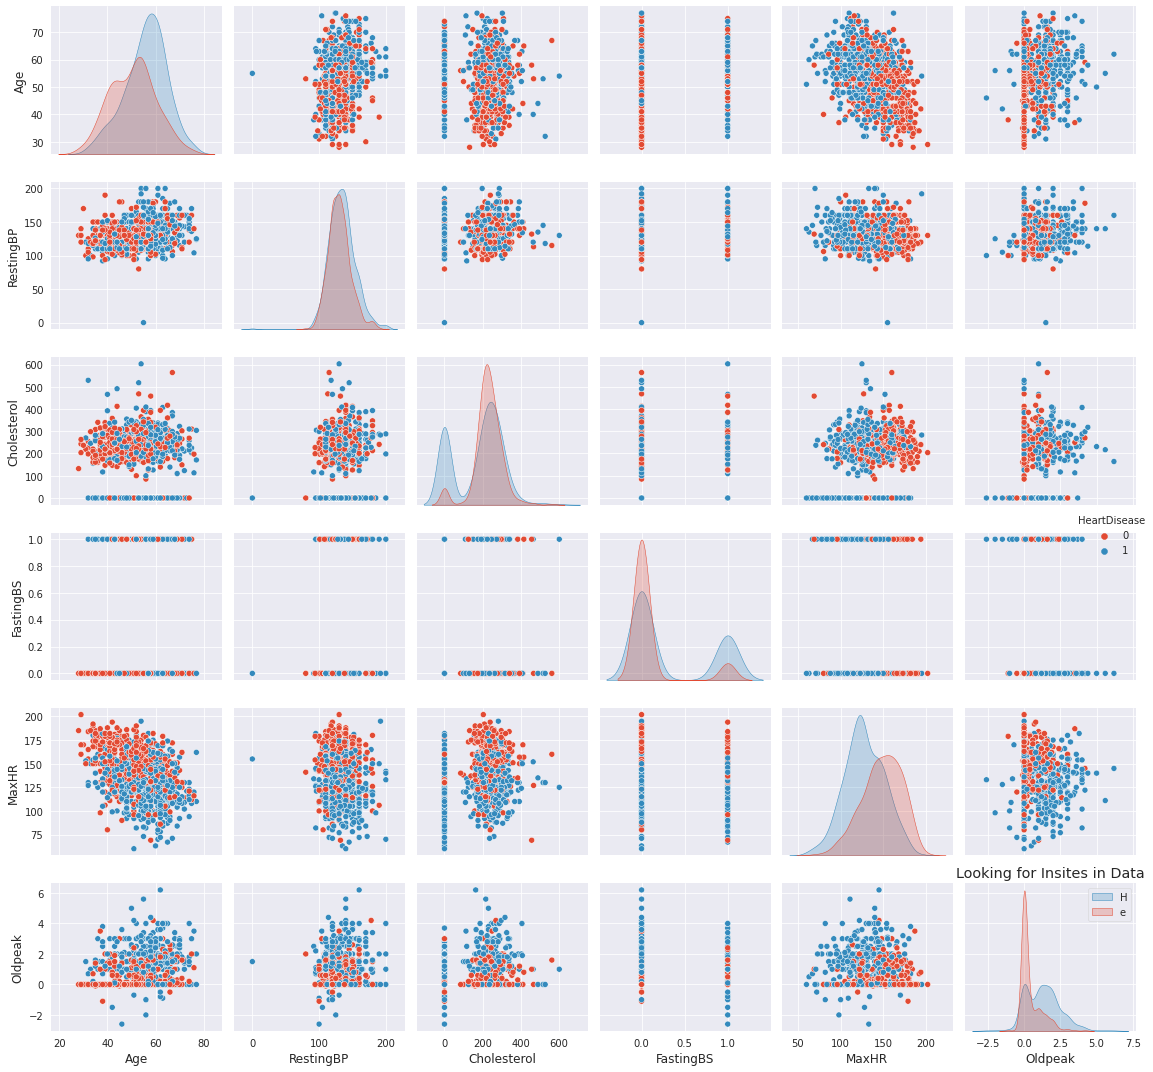

In [17]:
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

# **Check the Distribution and Skewness of the features**

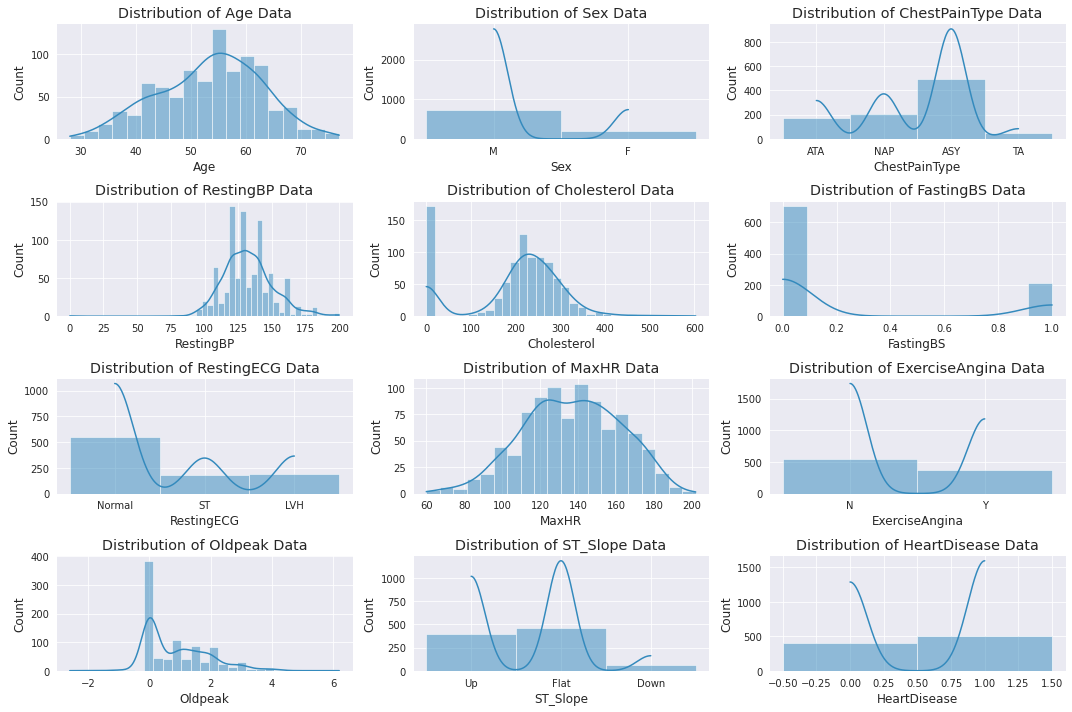

In [18]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()
    

# Check the Outliers using Box Plots

In [19]:
fig = px.box(df,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP")
fig.show()

In [20]:
fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age",color="Sex")
fig.show()

In [21]:
fig = px.box(df,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol",color="Sex")
fig.show()

In [22]:
fig = px.box(df,y="Oldpeak",x="HeartDisease",title=f"Distrubution of Oldpeak")
fig.show()

In [23]:
fig = px.box(df,y="MaxHR",x="HeartDisease",title=f"Distrubution of MaxHR",color="Sex")
fig.show()

# Robust Scaler will be used to prevent the outliers from causing training problems for Non-Tree algorithims

In [24]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [25]:
object_columns = df.select_dtypes(include='object').columns.tolist()
object_columns

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [26]:
features = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS','RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
target = 'HeartDisease'

In [27]:
X = df[features]
y = df[target]

In [28]:
encoder = LabelEncoder()
X = X.apply(encoder.fit_transform)
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2
...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1
914,40,1,0,45,51,1,1,67,0,42,1
915,29,1,0,31,9,0,1,41,1,22,1
916,29,0,1,31,94,0,0,100,0,10,1


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42,stratify = y)

# Tree Algorithims

In [30]:
feature_col_tree= X_train.columns.to_list()

In [31]:
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 15
from sklearn.ensemble import RandomForestClassifier

In [32]:
predictors = feature_col_tree
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validate(alg, dtrain[predictors], y_train, cv=cv_folds, scoring='accuracy')
    
    accuracy = metrics.accuracy_score(np.array(y_train),np.array(dtrain_predictions))
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : \n" + f'{accuracy}')
    #print ("AUC Score (Train): %f" + f'{metrics.roc_auc_score(dtrain['Decision'], dtrain_predprob)})
    
    if performCV:
         print ("CV Score :" f'{cv_score}')
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

# Gradient Boosting Trees


Model Report
Accuracy : 
0.9487179487179487
CV Score :{'fit_time': array([0.12094426, 0.1203115 , 0.12027287, 0.12011313, 0.12003636,
       0.12101197, 0.12044716, 0.12144971, 0.12015462, 0.12097454]), 'score_time': array([0.00215411, 0.00204349, 0.00211573, 0.00208044, 0.00204229,
       0.00205946, 0.00206995, 0.00210547, 0.00207472, 0.00220871]), 'test_score': array([0.85897436, 0.82051282, 0.85897436, 0.83333333, 0.85897436,
       0.85897436, 0.84615385, 0.87179487, 0.82051282, 0.88461538])}


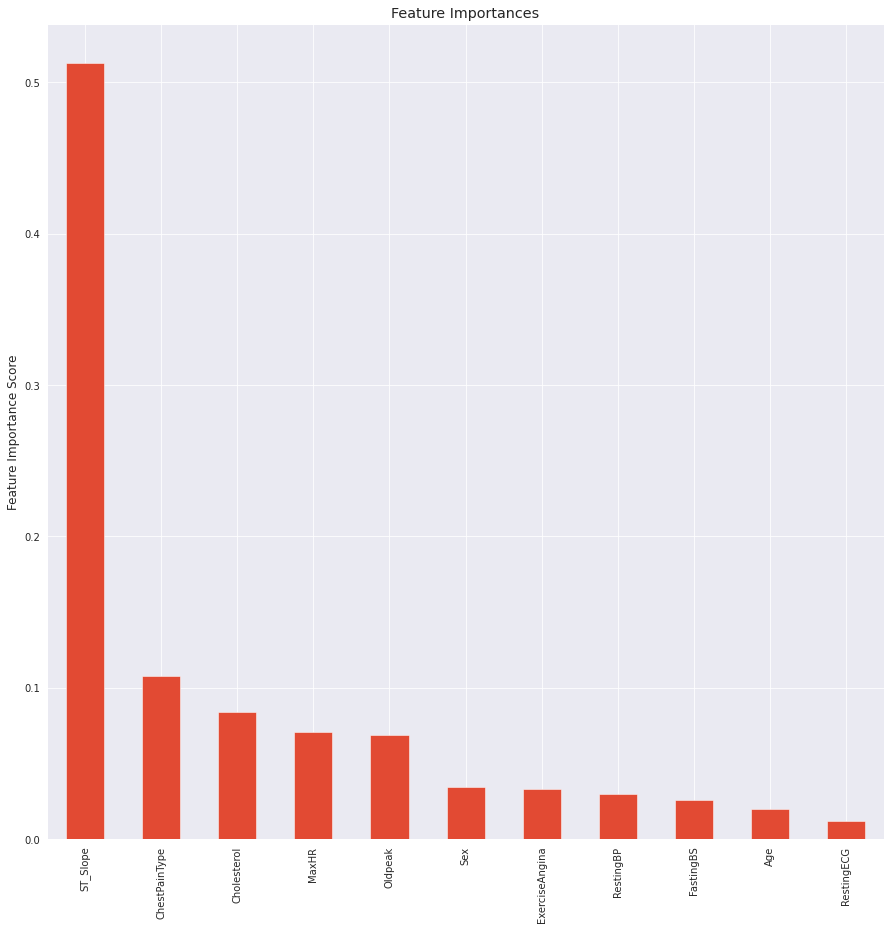

In [33]:
#Choose all predictors except target & IDcols
gbc = GradientBoostingClassifier(random_state=10)
modelfit(gbc, X_train, predictors)

In [34]:
param_test = {'max_features':range(2,6,2)}
gsearch = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators = 60,max_depth = 9, min_samples_split = 15, subsample = 0.8, random_state=10),
param_grid = param_test, scoring='accuracy',n_jobs = -1,iid=False, cv=10)
gsearch.fit(X_train ,y_train)

GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(max_depth=9,
                                                  min_samples_split=15,
                                                  n_estimators=60,
                                                  random_state=10,
                                                  subsample=0.8),
             iid=False, n_jobs=-1, param_grid={'max_features': range(2, 6, 2)},
             scoring='accuracy')


Model Report
Accuracy : 
1.0
CV Score :{'fit_time': array([0.14731836, 0.14356041, 0.14711928, 0.14936852, 0.14383459,
       0.14936376, 0.14646506, 0.1492877 , 0.14692903, 0.15433192]), 'score_time': array([0.00257659, 0.0022316 , 0.00220513, 0.00247717, 0.00221848,
       0.00222039, 0.00221729, 0.00223279, 0.00230384, 0.00228524]), 'test_score': array([0.84615385, 0.85897436, 0.85897436, 0.85897436, 0.84615385,
       0.85897436, 0.85897436, 0.8974359 , 0.79487179, 0.87179487])}


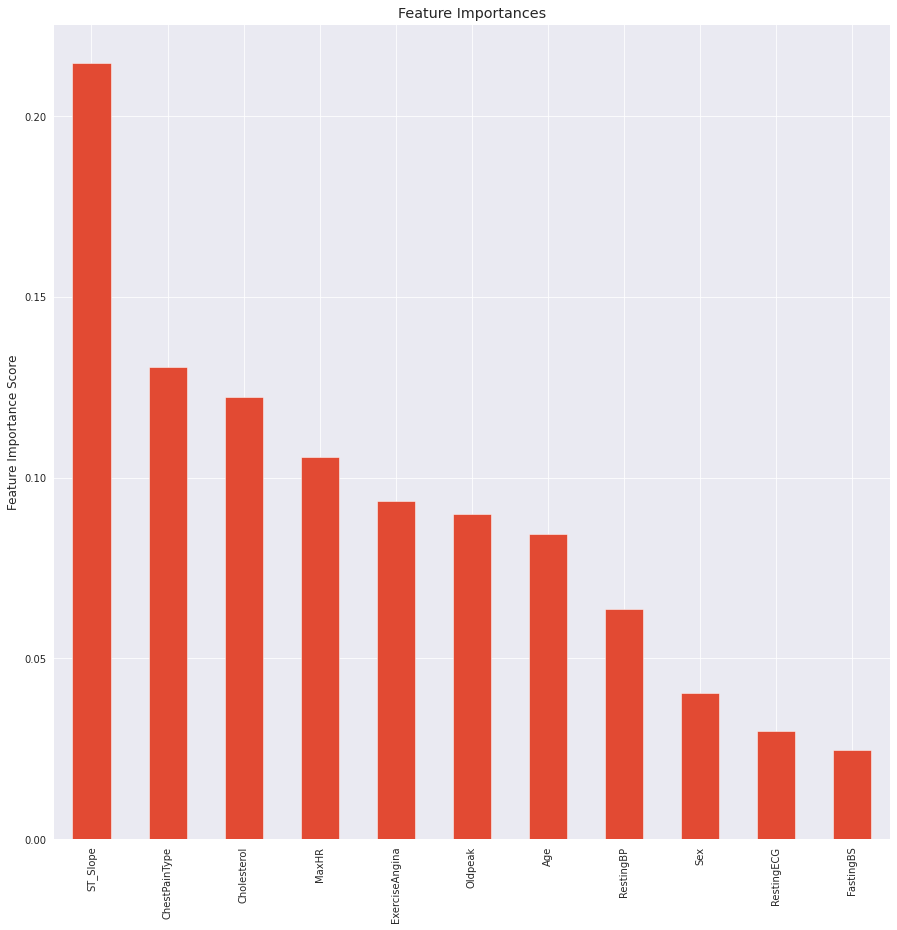

In [35]:
modelfit(gsearch.best_estimator_, X_train, predictors)

In [36]:
param_test2 = {'min_samples_split':range(10,500,20),'learning_rate':np.arange(0.02, 0.1, 0.02),'max_features':range(2,6,2)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(max_features=4,n_estimators=100,max_depth=10,min_samples_leaf=40, random_state=10),
                        param_grid = param_test2, 
                        scoring='accuracy',
                        iid=False,
                        cv=10)
gsearch2.fit(X_train ,y_train)

GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(max_depth=10, max_features=4,
                                                  min_samples_leaf=40,
                                                  random_state=10),
             iid=False,
             param_grid={'learning_rate': array([0.02, 0.04, 0.06, 0.08]),
                         'max_features': range(2, 6, 2),
                         'min_samples_split': range(10, 500, 20)},
             scoring='accuracy')


Model Report
Accuracy : 
0.9307692307692308
CV Score :{'fit_time': array([0.12815213, 0.14445376, 0.20522356, 0.25427413, 0.13365626,
       0.12716746, 0.10341692, 0.08713341, 0.09078956, 0.08969522]), 'score_time': array([0.00311708, 0.00669503, 0.01019454, 0.01083827, 0.00321484,
       0.00292253, 0.00217652, 0.00220037, 0.00218773, 0.00221491]), 'test_score': array([0.8974359 , 0.91025641, 0.85897436, 0.84615385, 0.91025641,
       0.87179487, 0.84615385, 0.8974359 , 0.82051282, 0.91025641])}


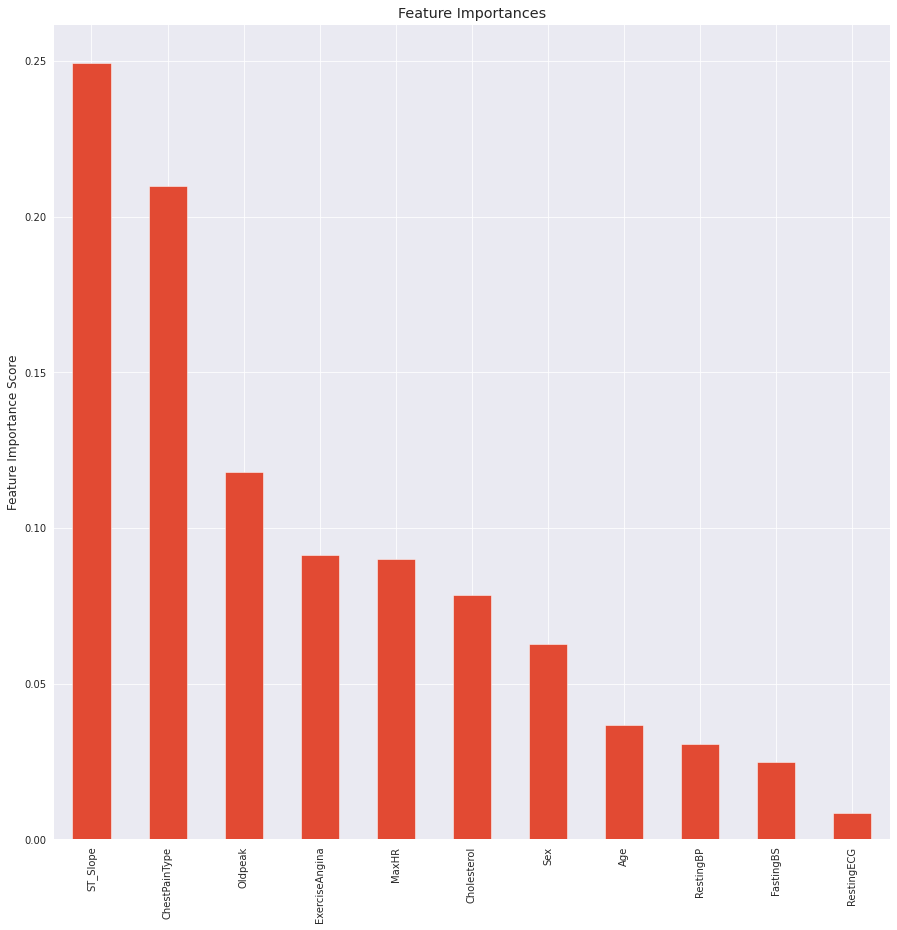

In [37]:
modelfit(gsearch2.best_estimator_, X_train, predictors)

# Random Forest Classifier

In [38]:
rf_param_test3 = {'min_samples_split':range(10,100,15),'min_samples_leaf':range(2,20,4),'bootstrap':[True,False],'max_depth':range(3,15,3)}
rf_gsearch = GridSearchCV(estimator = RandomForestClassifier(max_features=10,n_estimators=100, random_state=10),
                        param_grid = rf_param_test3 , 
                        scoring='accuracy',
                        iid=False,
                        cv=10)
rf_gsearch.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_features=10, random_state=10),
             iid=False,
             param_grid={'bootstrap': [True, False],
                         'max_depth': range(3, 15, 3),
                         'min_samples_leaf': range(2, 20, 4),
                         'min_samples_split': range(10, 100, 15)},
             scoring='accuracy')


Model Report
Accuracy : 
0.8692307692307693
CV Score :{'fit_time': array([0.28447533, 0.30145717, 0.23739409, 0.19282961, 0.19349599,
       0.19341564, 0.19131899, 0.19231439, 0.1921618 , 0.20361876]), 'score_time': array([0.01520133, 0.0143168 , 0.0089674 , 0.00869155, 0.00884914,
       0.00862479, 0.00871491, 0.00906992, 0.00885487, 0.00868416]), 'test_score': array([0.85897436, 0.88461538, 0.91025641, 0.82051282, 0.84615385,
       0.83333333, 0.87179487, 0.84615385, 0.80769231, 0.85897436])}


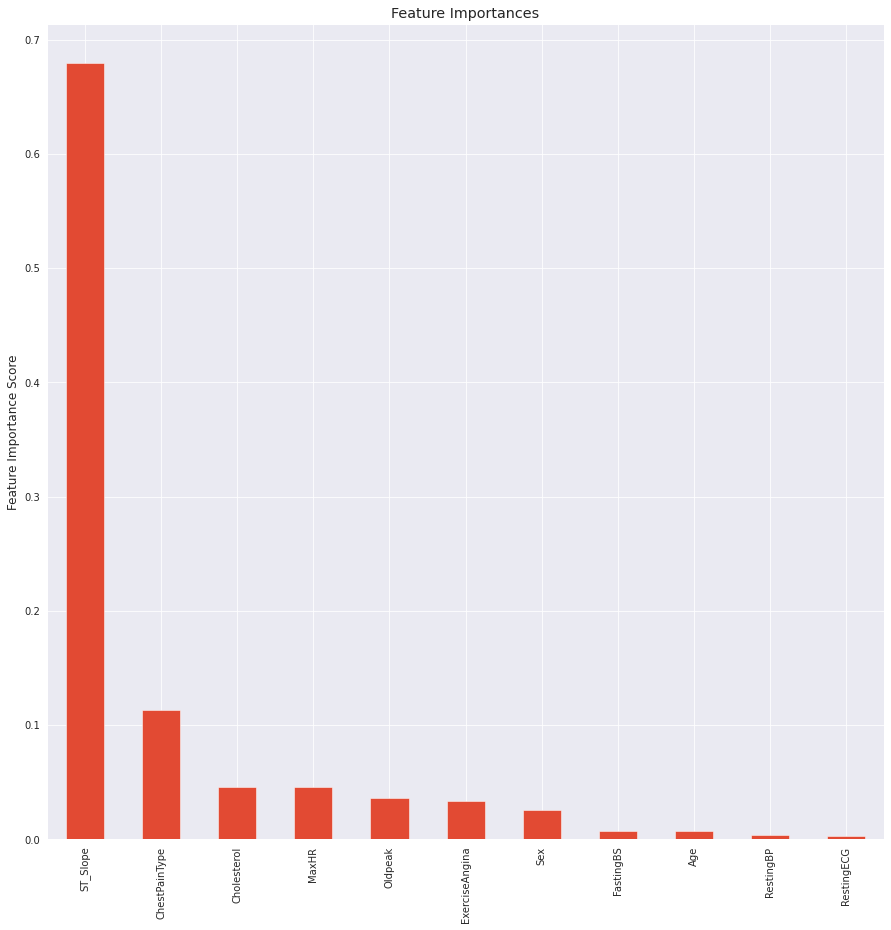

In [39]:
modelfit(rf_gsearch.best_estimator_, X_train, predictors)

# Try the best tree model on test data

In [40]:
Y_pred = gsearch2.predict(X_test)

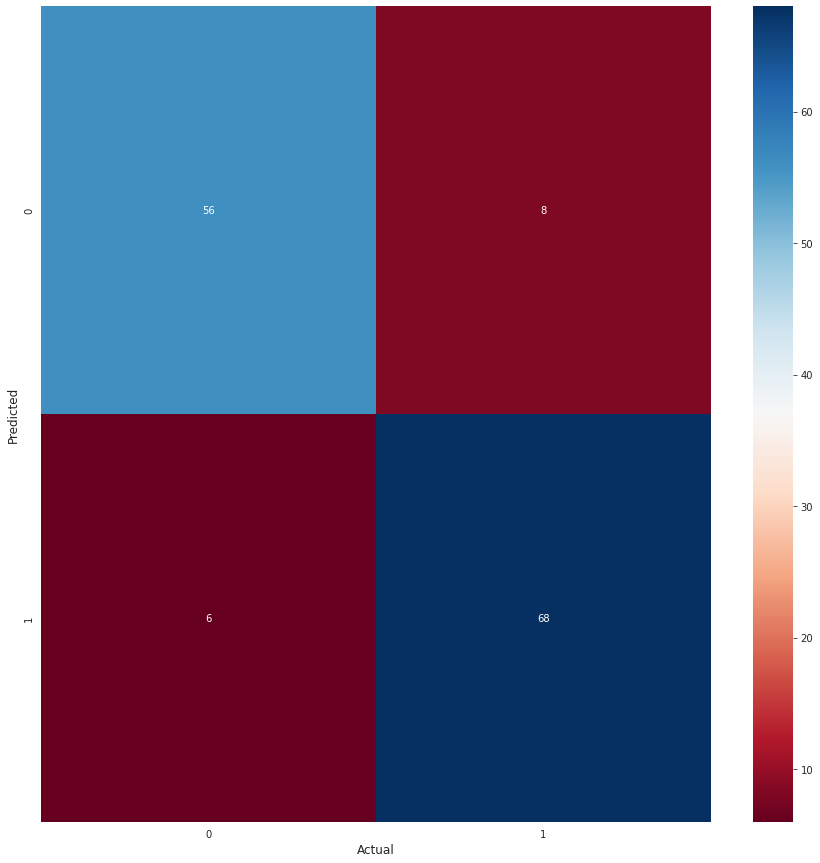

In [41]:
cm = confusion_matrix(Y_pred,y_test)
plt.figure()
sns.heatmap(cm, annot = True,fmt='d' ,cmap='RdBu')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred, target_names = ['Safe','Failure']))

              precision    recall  f1-score   support

        Safe       0.88      0.90      0.89        62
     Failure       0.92      0.89      0.91        76

    accuracy                           0.90       138
   macro avg       0.90      0.90      0.90       138
weighted avg       0.90      0.90      0.90       138



# Non - Tree Algorithims

**One Hot Encoding**

In [43]:
## Creaeting one hot encoded features for working with non tree based algorithms 
X2 = pd.get_dummies(X,columns = object_columns,drop_first=False)
X2.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_0,Sex_1,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3,RestingECG_0,RestingECG_1,RestingECG_2,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,12,41,147,0,98,10,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,21,55,40,0,82,20,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,9,31,141,0,25,10,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,20,39,72,0,34,25,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,26,49,53,0,48,10,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.15, random_state=42,stratify = y)

In [45]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_0,Sex_1,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3,RestingECG_0,RestingECG_1,RestingECG_2,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_0,ST_Slope_1,ST_Slope_2
887,15,33,105,1,69,11,0,1,1,0,0,0,1,0,0,0,1,0,1,0
815,40,21,135,0,77,20,0,1,0,0,1,0,0,1,0,1,0,0,0,1
754,29,33,65,0,94,10,0,1,1,0,0,0,0,1,0,0,1,0,0,1
876,32,31,64,0,58,34,0,1,1,0,0,0,1,0,0,0,1,0,1,0
400,22,55,0,1,36,10,1,0,1,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,18,22,88,0,76,10,0,1,0,0,1,0,0,1,0,1,0,0,0,1
567,43,31,79,0,41,10,0,1,1,0,0,0,0,0,1,0,1,0,1,0
458,33,35,0,1,14,25,0,1,1,0,0,0,0,0,1,1,0,0,1,0
252,33,26,150,0,41,10,0,1,1,0,0,0,0,0,1,0,1,0,0,1


**Robust Scaler**

In [46]:
scaler = preprocessing.RobustScaler()
scaler = scaler.fit(X_train)

In [47]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
X_train = pd.DataFrame(X_train, columns = X2.columns)
X_test = pd.DataFrame(X_test, columns = X2.columns)

In [49]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_0,Sex_1,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3,RestingECG_0,RestingECG_1,RestingECG_2,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,-0.857143,0.10,0.266667,1.0,0.134228,-0.266667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-1.0,1.0,0.0,0.0,0.0
1,0.928571,-0.50,0.600000,0.0,0.348993,0.333333,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
2,0.142857,0.10,-0.177778,0.0,0.805369,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,-1.0,1.0
3,0.357143,0.00,-0.188889,0.0,-0.161074,1.266667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-1.0,1.0,0.0,0.0,0.0
4,-0.357143,1.20,-0.900000,1.0,-0.751678,-0.333333,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,-0.642857,-0.45,0.077778,0.0,0.322148,-0.333333,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
776,1.142857,0.00,-0.022222,0.0,-0.617450,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,1.0,0.0,0.0,0.0
777,0.428571,0.20,-0.900000,1.0,-1.342282,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0
778,0.428571,-0.25,0.766667,0.0,-0.617450,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,1.0,0.0,-1.0,1.0


In [50]:
predictors = X_train.columns

# K-NN Classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier



rf_param_test4 = {'n_neighbors':range(3,12,2)}
knn_gsearch = GridSearchCV(estimator = KNeighborsClassifier(),
                        param_grid = rf_param_test4 , 
                        scoring='accuracy',
                        iid=False,
                        cv=10)
knn_gsearch.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), iid=False,
             param_grid={'n_neighbors': range(3, 12, 2)}, scoring='accuracy')

In [52]:
modelfit(knn_gsearch.best_estimator_, X_train, predictors, printFeatureImportance = False)


Model Report
Accuracy : 
0.8897435897435897
CV Score :{'fit_time': array([0.00467825, 0.00458145, 0.00455976, 0.00457048, 0.00482321,
       0.00454807, 0.00445271, 0.00447345, 0.00442624, 0.0049684 ]), 'score_time': array([0.00621986, 0.00603199, 0.00636721, 0.00613523, 0.00610518,
       0.00593758, 0.00619984, 0.0060215 , 0.00625873, 0.00628448]), 'test_score': array([0.84615385, 0.85897436, 0.88461538, 0.83333333, 0.83333333,
       0.88461538, 0.87179487, 0.84615385, 0.80769231, 0.85897436])}


# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression


rf_param_test5 = {'warm_start':[True,False]}
LR_gsearch = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = rf_param_test5 , 
                        scoring='accuracy',
                        iid=False,
                        cv=10)
LR_gsearch.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), iid=False,
             param_grid={'warm_start': [True, False]}, scoring='accuracy')

In [54]:
modelfit(LR_gsearch.best_estimator_, X_train, predictors, printFeatureImportance = False)


Model Report
Accuracy : 
0.8576923076923076
CV Score :{'fit_time': array([0.01228642, 0.01187396, 0.01122737, 0.01186013, 0.01115632,
       0.01377416, 0.01151705, 0.01246524, 0.01264405, 0.01203942]), 'score_time': array([0.00240517, 0.00236177, 0.00236058, 0.00231338, 0.0023694 ,
       0.00236797, 0.00233364, 0.00237083, 0.00235915, 0.00232911]), 'test_score': array([0.88461538, 0.84615385, 0.88461538, 0.82051282, 0.85897436,
       0.88461538, 0.87179487, 0.82051282, 0.75641026, 0.83333333])}


In [55]:
from sklearn.svm import SVC

rf_param_test6 = {'C':[1,0.5,2],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
svc_gsearch = GridSearchCV(estimator = SVC( probability= True),
                        param_grid = rf_param_test6 , 
                        scoring='accuracy',
                        iid=False,
                        cv=10)
svc_gsearch.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=SVC(probability=True), iid=False,
             param_grid={'C': [1, 0.5, 2],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [56]:
modelfit(svc_gsearch.best_estimator_, X_train, predictors, printFeatureImportance = False)


Model Report
Accuracy : 
0.882051282051282
CV Score :{'fit_time': array([0.05344582, 0.05185652, 0.05254197, 0.05162215, 0.05252767,
       0.05398417, 0.05282998, 0.05141282, 0.05143166, 0.05121875]), 'score_time': array([0.00240088, 0.00241995, 0.00240946, 0.00243926, 0.00245357,
       0.00238013, 0.00248003, 0.00233197, 0.00228429, 0.00235796]), 'test_score': array([0.88461538, 0.87179487, 0.87179487, 0.82051282, 0.84615385,
       0.88461538, 0.88461538, 0.88461538, 0.79487179, 0.83333333])}


# Deep Learning - Artificial Neural Networks

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [58]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_0,Sex_1,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3,RestingECG_0,RestingECG_1,RestingECG_2,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,-0.857143,0.10,0.266667,1.0,0.134228,-0.266667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-1.0,1.0,0.0,0.0,0.0
1,0.928571,-0.50,0.600000,0.0,0.348993,0.333333,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
2,0.142857,0.10,-0.177778,0.0,0.805369,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,-1.0,1.0
3,0.357143,0.00,-0.188889,0.0,-0.161074,1.266667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-1.0,1.0,0.0,0.0,0.0
4,-0.357143,1.20,-0.900000,1.0,-0.751678,-0.333333,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,-0.642857,-0.45,0.077778,0.0,0.322148,-0.333333,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
776,1.142857,0.00,-0.022222,0.0,-0.617450,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,1.0,0.0,0.0,0.0
777,0.428571,0.20,-0.900000,1.0,-1.342282,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0
778,0.428571,-0.25,0.766667,0.0,-0.617450,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,1.0,0.0,-1.0,1.0


In [59]:
X_test

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_0,Sex_1,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3,RestingECG_0,RestingECG_1,RestingECG_2,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,-0.285714,-0.25,-0.366667,0.0,0.187919,-0.333333,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
1,1.071429,0.00,1.055556,0.0,-0.778523,1.266667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.214286,-0.85,-0.900000,0.0,0.483221,-0.333333,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.714286,0.40,0.144444,0.0,0.375839,-0.200000,1.0,-1.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-1.0,1.0,0.0,0.0,0.0
4,-0.571429,-0.90,0.222222,0.0,0.375839,-0.333333,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,-0.500000,1.20,1.300000,0.0,-1.020134,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0
134,0.000000,1.20,0.766667,1.0,0.134228,1.000000,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0
135,-0.071429,0.50,0.933333,0.0,0.053691,-0.333333,1.0,-1.0,-1.0,1.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,-1.0,1.0
136,-0.285714,-0.70,0.388889,1.0,-1.100671,0.333333,1.0,-1.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,1.0


In [60]:
model = Sequential()


model.add(Dense(units=20,activation='relu'))

model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=5,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam',metrics= 'accuracy')

2022-01-16 14:18:44.944068: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-16 14:18:44.945166: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-16 14:18:44.945800: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-16 14:18:44.946718: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [61]:
model.fit(X_train, 
          y_train, 
          epochs=100,
          callbacks = [callback],
          validation_data=(X_test, y_test), verbose=1
          )

2022-01-16 14:18:47.484848: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
25/25 [==============================] - 2s 11ms/step - loss: 0.6976 - accuracy: 0.5474 - val_loss: 0.6862 - val_accuracy: 0.7391
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6801 - accuracy: 0.7590 - val_loss: 0.6650 - val_accuracy: 0.7391
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6434 - accuracy: 0.7846 - val_loss: 0.6061 - val_accuracy: 0.8043
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5585 - accuracy: 0.8410 - val_loss: 0.4998 - val_accuracy: 0.8551
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4622 - accuracy: 0.8410 - val_loss: 0.4052 - val_accuracy: 0.8768
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3909 - accuracy: 0.8500 - val_loss: 0.3568 - val_accuracy: 0.8841
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3566 - accuracy: 0.8526 - val_loss: 0.3276 - val_accuracy: 0.8913
Epoch 8/100


# Looks like the best 2 models are Gradient boosting trees and ANN for this dataset :) 